In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy import interp
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, label_binarize, LabelBinarizer
from sklearn.metrics import r2_score, mean_squared_error, roc_auc_score, roc_curve, auc, plot_confusion_matrix

from sklearn.linear_model import SGDRegressor, LinearRegression, BayesianRidge, Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge

import xgboost as xgb
from xgboost import XGBRegressor

import lightgbm
from lightgbm import LGBMRegressor

import catboost as cb
from catboost import CatBoostRegressor

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.options.mode.chained_assignment = None

### Preprocessing

Создаем выборки

In [35]:
X = pd.read_csv('C:/Users/Barca/Desktop/GitHub/IPO_Analysis/model_ver_based_on_2022/X.csv')
y = pd.read_csv('C:/Users/Barca/Desktop/GitHub/IPO_Analysis/model_ver_based_on_2022/y.csv')

X_demo = pd.read_csv('C:/Users/Barca/Desktop/GitHub/IPO_Analysis/model_ver_based_on_2022/X_demo.csv')
demo_set = pd.read_csv('C:/Users/Barca/Desktop/GitHub/IPO_Analysis/model_ver_based_on_2022/demo_set.csv')
# X_send = X.copy()
# X_send.columns = ['col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9']
# X_send.to_csv('X_send_w2.csv', encoding = 'utf-8-sig')

# y_send = y.copy()
# y_send.columns = ['answer']
# y_send.to_csv('y_send_w2.csv', encoding = 'utf-8-sig')

features = X.columns
features_set = []

X = X.values.astype(float) #X = X.to_numpy(dtype=np.float)
X_demo = X_demo.values.astype(float) #X = X.to_numpy(dtype=np.float)
y = y.astype(int)
y = y.values.ravel() #y = y.to_numpy()
print(X.shape)
print(y.shape)

(33996, 10)
(33996,)


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #stratify=y

skaler = StandardScaler()
X_train_t = skaler.fit_transform(X_train)
X_test_t = skaler.transform(X_test)

In [37]:
X_demo_t = skaler.transform(X_demo)

### Sklearn Linear Models

In [4]:
# param_grid = {
#     'loss': ['squared_loss'],
#     'penalty': ['l2', 'l1', 'elasticnet'],
#     'learning_rate': ['constant', 'optimal', 'invscaling']
# }

# estimator = LinearRegression(positive=True)
# estimator = SGDRegressor()
# estimator = Ridge()

# grid_search = GridSearchCV(estimator = estimator, param_grid = param_grid, n_jobs = -1)
# grid_search.fit(X_train_t, y_train)
# best_grid = grid_search.best_estimator_
# grid_search.best_params_

#######################################################

#best_grid = LinearRegression(positive=True)
#best_grid = SGDRegressor()
best_grid = Ridge()

In [5]:
best_grid.fit(X_train_t, y_train)
predicted_labels = best_grid.predict(X_test_t)
best_grid.score(X_test_t, y_test)

0.46039514723490327

In [6]:
print("Coefficients: \n", best_grid.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, predicted_labels))
print("Coefficient of determination: %.2f" % r2_score(y_test, predicted_labels))

Coefficients: 
 [-0.01014777 -0.11977193 -0.05123474  0.02745124 -0.07897944  0.48400526
  0.355608    0.05454872  0.3336738   0.12684704]
Mean squared error: 0.96
Coefficient of determination: 0.46


### Sklearn SVR

In [7]:
# param_grid = {
#     'loss': ['squared_loss'],
#     'penalty': ['l2', 'l1', 'elasticnet'],
#     'learning_rate': ['constant', 'optimal', 'invscaling']
# }

# estimator = SVR()

# grid_search = GridSearchCV(estimator = estimator, param_grid = param_grid, n_jobs = -1)
# grid_search.fit(X_train_t, y_train)
# best_grid1 = grid_search.best_estimator_
# grid_search.best_params_

#######################################################

best_grid1 = SVR()

In [8]:
best_grid1.fit(X_train_t, y_train)
predicted_labels = best_grid1.predict(X_test_t)
best_grid1.score(X_test_t, y_test)

0.482727024062526

In [9]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, predicted_labels))
print("Coefficient of determination: %.2f" % r2_score(y_test, predicted_labels))

Mean squared error: 0.92
Coefficient of determination: 0.48


### Sklearn Gradient Boosting

In [10]:
param_grid = {
    'learning_rate': [0.01],
    'max_depth': [5], #, 10
    'n_estimators': [1000],
    'subsample': [0.5] #0.1
}

estimator = GradientBoostingRegressor()

grid_search = GridSearchCV(estimator = estimator, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2)
grid_search.fit(X_train_t, y_train)
print(grid_search.best_score_)
print(grid_search.best_params_)
best_grid2 = grid_search.best_estimator_

#######################################################

#best_grid2 = GradientBoostingRegressor()

Fitting 5 folds for each of 1 candidates, totalling 5 fits
0.49005664985037917
{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 1000, 'subsample': 0.5}


In [11]:
best_grid2.fit(X_train_t, y_train)
predicted_labels = best_grid2.predict(X_test_t)
best_grid2.score(X_test_t, y_test)

0.4920010219103682

In [12]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, predicted_labels))
print("Coefficient of determination: %.2f" % r2_score(y_test, predicted_labels))

Mean squared error: 0.91
Coefficient of determination: 0.49


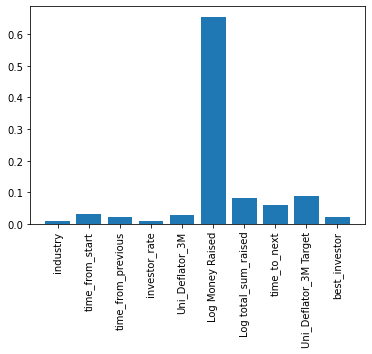

In [13]:
plt.bar(range(len(features)), best_grid2.feature_importances_)
plt.xticks(range(len(features)), features, rotation='vertical')
plt.show()

### XGBoost

In [14]:
param_grid = {
    "max_depth": [5], #, 10
    'n_estimators': [1000],
    "learning_rate": [0.01], #, 0.05
    #"gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1] #, 10
}

estimator = XGBRegressor()

grid_search = GridSearchCV(estimator, param_grid, n_jobs=-1, cv = 5, verbose = 2)
grid_search.fit(X_train_t, y_train)
print(grid_search.best_score_)
print(grid_search.best_params_)
best_grid3 = grid_search.best_estimator_

#######################################################

#best_grid3 = XGBRegressor()

Fitting 5 folds for each of 2 candidates, totalling 10 fits
0.48853044910178933
{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 1000, 'reg_lambda': 1}


In [15]:
best_grid3.fit(X_train_t, y_train)
predicted_labels = best_grid3.predict(X_test_t)
best_grid3.score(X_test_t, y_test)

0.4874900572014046

In [16]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, predicted_labels))
print("Coefficient of determination: %.2f" % r2_score(y_test, predicted_labels))

Mean squared error: 0.92
Coefficient of determination: 0.49


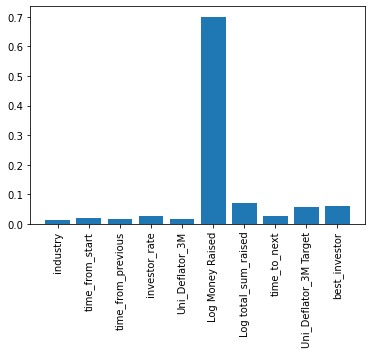

In [17]:
plt.bar(range(len(features)), best_grid3.feature_importances_)
plt.xticks(range(len(features)), features, rotation='vertical')
plt.show()

In [18]:
# pd.DataFrame(grid_search.cv_results_).to_csv('cv_results.csv')
# sklearn.metrics.plot_confusion_matrix(best_grid3, X_test_t, y_test, xticks_rotation='horizontal', cmap='viridis', colorbar=True, normalize='true')
# sklearn.metrics.plot_confusion_matrix(best_grid3, X_train_t, y_train, xticks_rotation='horizontal', cmap='viridis', colorbar=True, normalize='true')

### LightGBM

In [19]:
param_grid = {
    "max_depth": [3, 5, 10],
    "learning_rate": [0.01, 0.1],
    'n_estimators': [100, 500, 1000],
    #"reg_alpha": [0, 0.1, 0.25],
    #"reg_lambda": [0, 0.1, 0.25],
    #"subsample": [0.8],
    #"colsample_bytree": [0.5],
    #"min_child_samples": [5, 20, 100],
    #'num_leaves': [10, 30, 50],
    'boosting_type': ['gbdt', 'rf', 'dart']
}

estimator = LGBMRegressor()

grid_search = GridSearchCV(estimator, param_grid, n_jobs=-1, cv = 5, verbose = 2)
grid_search.fit(X_train_t, y_train)
print(grid_search.best_score_)
print(grid_search.best_params_)
best_grid4 = grid_search.best_estimator_

#######################################################

#best_grid4 = LGBMRegressor()
#LGBMRanker

Fitting 5 folds for each of 54 candidates, totalling 270 fits


C:\Users\Barca\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [  0.3761643    0.48176202   0.48865772   0.40010547   0.48881827
   0.48937615   0.40238004   0.48957839   0.48920088   0.48810223
   0.48683621   0.48041966   0.48838337   0.47297832   0.45484026
   0.48747801   0.46641221   0.44653129          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan -19.69376223  -6.64801233  -2.30122451 -19.67522701
  -6.62577441  -2.28528838 -19.67398714  -6.62398817  -2.28473803
  -0.97479982   0.47687042   0.47717568  -0.96341921   0.47389202
   0.47008729  -0.96306484   0.47240413   0.46705037]
  warnings.warn(


0.4895783866738238
{'boosting_type': 'gbdt', 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 500}


In [20]:
best_grid4.fit(X_train_t, y_train)
predicted_labels = best_grid4.predict(X_test_t)
best_grid4.score(X_test_t, y_test)

0.49190710164958673

In [21]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, predicted_labels))
print("Coefficient of determination: %.2f" % r2_score(y_test, predicted_labels))

Mean squared error: 0.91
Coefficient of determination: 0.49


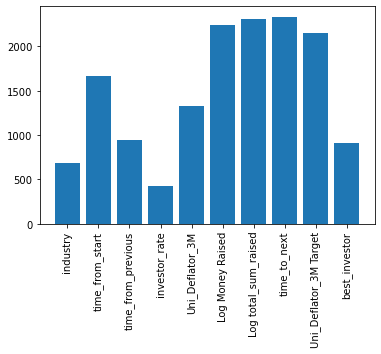

In [22]:
plt.bar(range(len(features)), best_grid4.feature_importances_)
plt.xticks(range(len(features)), features, rotation='vertical')
plt.show()

### Catboost

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_eval, y_train, y_eval = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

skaler = StandardScaler()
X_train_t = skaler.fit_transform(X_train)
X_eval_t = skaler.fit_transform(X_eval)
X_test_t = skaler.transform(X_test)

In [24]:
model = CatBoostRegressor(has_time=True, iterations=500, depth=10, learning_rate=0.1, loss_function='RMSE')
model.fit(X_train_t, y_train, eval_set=(X_eval_t, y_eval), verbose=100)

#print ('CatBoost: prediction of %s: RMSLE on test = %s' % ('not_dead', model.evals_result_['validation']['CrossEntropy'][-1]))

0:	learn: 1.2852127	test: 1.3015589	best: 1.3015589 (0)	total: 226ms	remaining: 1m 52s
100:	learn: 0.8612274	test: 0.9807415	best: 0.9804388 (75)	total: 6.39s	remaining: 25.3s
200:	learn: 0.7971200	test: 0.9857699	best: 0.9804388 (75)	total: 12.5s	remaining: 18.6s
300:	learn: 0.7430276	test: 0.9905213	best: 0.9804388 (75)	total: 18.8s	remaining: 12.4s
400:	learn: 0.6971973	test: 0.9964431	best: 0.9804388 (75)	total: 25.2s	remaining: 6.22s
499:	learn: 0.6583969	test: 1.0001145	best: 0.9804388 (75)	total: 31.4s	remaining: 0us

bestTest = 0.9804388301
bestIteration = 75

Shrink model to first 76 iterations.


In [25]:
y_pred = model.predict(X_test_t)
y_pred

array([15.152244  , 15.03945499, 15.35739727, ..., 16.05277755,
       16.16328916, 15.51018277])

In [26]:
y_test

array([15, 14, 17, ..., 15, 18, 15])

In [27]:
print(model.get_feature_importance(type=cb.EFstrType.PredictionValuesChange, prettified=True).head(25).to_string())
print(model.score(X_test_t, y_test))

  Feature Id  Importances
0          5    28.845630
1          6    13.506736
2          8    12.190113
3          7    10.568931
4          9     6.766084
5          1     6.681492
6          0     6.353042
7          2     5.890788
8          4     5.055052
9          3     4.142131
0.49047102505342266


### Прогноз

In [38]:
predicted_labels1 = best_grid1.predict(X_demo_t)
predicted_labels2 = best_grid2.predict(X_demo_t)
predicted_labels3 = best_grid3.predict(X_demo_t)
predicted_labels4 = best_grid4.predict(X_demo_t)
predicted_labels5 = model.predict(X_demo_t)

In [39]:
a = pd.DataFrame(list(predicted_labels1), columns =['SVR'])
b = pd.DataFrame(list(predicted_labels2), columns =['Gradient_Boosting'])
c = pd.DataFrame(list(predicted_labels3), columns =['XGBoost_Regressor'])
d = pd.DataFrame(list(predicted_labels4), columns =['LGBM_Regressor'])
e = pd.DataFrame(list(predicted_labels5), columns =['CatBoost_Regressor'])
demo = pd.concat([demo_set[['Organization Name']].reset_index(drop=True), a, b, c, d, e], axis=1)
demo.to_csv('forecast_20_22.csv', encoding = 'utf-8-sig')
demo

,Organization Name,SVR,Gradient_Boosting,XGBoost_Regressor,LGBM_Regressor,CatBoost_Regressor
0,0x,17.825822,17.891954,17.794796,17.821367,17.785902
1,10 Federal,17.267599,17.015327,16.988573,16.741402,17.010776
2,Redox,17.427946,17.334937,17.242537,17.276771,17.267591
3,100ms,17.152966,17.016098,17.016924,16.921883,17.025309
4,100Plus,16.733685,16.717999,16.643480,16.611615,16.683250
...,...,...,...,...,...,...
6980,Zuum Transportation,16.272857,16.312531,16.391939,16.323936,16.364360
6981,Zwift,18.602491,18.818592,19.016096,18.936832,18.630381
6982,ZwitterCo,17.017759,16.422048,16.295721,16.354373,16.832906
6983,Zycada,16.508509,16.150498,16.095684,16.188159,16.214500


### Сокращение размерности

In [34]:
#pca = PCA()
#pca.fit(X_train_t)

#variance = np.cumsum(pca.explained_variance_ratio_)

#plt.figure(figsize=(5,5))
#plt.plot(variance)
#plt.xlabel('Components')
#plt.ylabel('EVR')
#plt.plot([0,46],[0.95,0.95])
#plt.show()

In [35]:
#pca = PCA(n_components=39)

#X_train_pca = pca.fit_transform(X_train_t)
#X_test_pca = pca.transform(X_test_t)

In [36]:
#pg = {'C': np.linspace(0.01, 1, 10), 'penalty': ['l1', 'l2']}
#pg = {'n_neighbors': range(1, 31)}
#pg = {'max_depth': np.linspace(1, 100, 5)}

In [37]:
#classifier = LogisticRegression(solver='saga', multi_class='multinomial', max_iter=100, n_jobs =-1) #lbfgs
#classifier = KNeighborsClassifier(weights='distance')
#classifier = DecisionTreeClassifier()

#grid_search = GridSearchCV(estimator=classifier, n_jobs = -1, param_grid=pg, cv=5, scoring='accuracy')
#grid_search.fit(X_train_pca, y_train)

#grid_search.best_params_

In [38]:
#predicted_labels = grid_search.predict(X_test_pca)

#acc = accuracy_score(y_test, predicted_labels)
#f1 = f1_score(y_test, predicted_labels, average='weighted')
#print('acc = ', acc)
#print('f1 = ', f1)

### SelectKBest

In [8]:
# selector = SelectKBest(f_classif, k='all')
# selector.fit(X_train_t, y_train)

# #самый большой результат соответствует самому малому значению p-значения(вероятность ошибки)
# #поэтому "переворачиваем", чтоб самые ценные признаки на графике были максимальными
# scores = -np.log10(selector.pvalues_)

# plt.bar(range(len(features)), scores)
# plt.xticks(range(len(features)), features, rotation='vertical')
# plt.show()